#**GIỚI THIỆU**
###**- Đề tài:** DỰ ĐOÁN MẮC BỆNH TIỂU ĐƯỜNG

Cùng với sự phát triển của thời đại, công nghệ thông tin ngày nay được sử dụng nhiều vào các lĩnh vực khác nhau, đóng vai trò quan trọng trong đời sống con người. Chính vì thế, lượng dữ liệu khổng lồ mới luôn được cập nhật liên tục, tạo điều kiện thuận lợi để nắm bắt xu hướng đổi mới. Như John Hagel III đã nói rằng "Dữ liệu là dầu mỏ của thời đại kỹ thuật số." câu nói này nhấn mạnh tầm quan trọng của dữ liệu, có dữ liệu chẳng khác gì có được nguồn tài nguyên quý giá.

Khai phá dữ liệu được ví như chìa khóa để mở ra cánh cửa tri thức, bởi vì tính thực tế của nó có thể giải quyết hầu hết các vấn đề của xã hội. Qua việc sử dụng thuật toán và những kỹ thuật tiên tiến để phân tích, thống kê những xu hướng của thời đại, dự đoán các sự kiện trong tương lai và còn nhiều mặt khác để thúc đẩy đổi mới, nâng cao chất lượng cuộc sống.


Trong lĩnh vực y tế, việc đưa ra những dự đoán nhanh chóng và chính xác là điều rất cần thiết, chính vì vậy con người đã tích hợp sử dụng trí tuệ nhân tạo (AI), học máy (machine learning) vào trong y tế và sử dụng rộng rãi. Nhờ hệ thống dự đoán của máy học trong y tế, thì việc nhận biết dự đoán bằng kỹ thuật thông thường đã được nâng cao đáng kể, giúp phát hiện được những căn bệnh tiềm tàng mà người bệnh có thể gặp phải, từ đó đưa ra đánh giá và cho ra kết quả điều trị kịp thời.


Theo thống kê của thế giới số người mắc bệnh tiểu đường năm 2024 dự kiến là 578 triệu người và có tỷ lệ tử vong là 7,1 triệu người, đây là một con số báo động vì tỷ lệ tử vong vẫn đang ở mức rất cao. Vì thế việc chuẩn đoán bệnh tiểu đường bằng máy học trong y tế cần được đặt lên hàng đầu để đưa ra chuẩn đoán chính xác để phát hiện bệnh tật sớm và đưa ra những phương hướng điều trị kịp thời. Nhờ đó đề tài dự đoán bệnh tiểu đường bằng máy học được nghiêm cứu và đánh giá qua bài báo cáo sau đây.


###**- Nhãn dự đoán:** 0 (Không) hoặc 1 (Có)
###**- Bộ dữ liệu:** [Diabetes Dataset](https://www.kaggle.com/datasets/mathchi/diabetes-data-set)



**BỆNH TIỂU ĐƯỜNG**

**Pregnancies:** Số lần mang thai

**Glucose:** Nồng độ glucose huyết tương 2 giờ trong xét nghiệm dung nạp glucose đường uống

**BloodPressure:** Huyết áp tâm trương (mm Hg)

**SkinThickness:** Độ dày nếp gấp da cơ tam đầu (mm)

**Insulin:** Huyết thanh 2 giờ (mu U/ml)

**BMI:** Chỉ số khối cơ thể (cân nặng tính bằng kg/(chiều cao tính bằng m)^2)

**DiabetesPedigreeFunction:** Chức năng phả hệ của bệnh tiểu đường

**Age:** Tuổi (năm)

**Outcome:** có bệnh (1) hoặc không bệnh (0)

# **IMPORT THƯ VIỆN**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from itertools import cycle

# **TẢI DỮ LIỆU**

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

# **ĐỌC DỮ LIỆU**

In [ ]:
df = pd.read_csv('/content/diabetes.csv')

# **EDA**

## **Hiển thị bộ dữ liệu**

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## **Thông tin tổng quan**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## **Thống kê mô tả**

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**1. Pregnancies** (Số lượng thai kỳ)

* **Mean:** Trung bình có khoảng 3.85 lần mang thai.

* **Std:** Độ lệch chuẩn là 3.37, cho thấy sự biến động lớn trong số lượng thai kỳ giữa các bệnh nhân.

* **Min:** Ít nhất là 0 lần (người chưa từng mang thai).

* **Max:** Nhiều nhất là 17 lần.

**2. Glucose** (Nồng độ glucose)

* **Mean:** Trung bình nồng độ glucose là 120.89 mg/dL.

* **Std:** Độ lệch chuẩn là 31.97, cho thấy sự biến động lớn trong nồng độ glucose.

* **Min:** Ít nhất là 0 mg/dL, điều này có thể là giá trị bị thiếu hoặc không hợp lệ.

* **Max:** Nhiều nhất là 199 mg/dL.

**3. BloodPressure** (Huyết áp)

* **Mean:** Trung bình huyết áp là 69.11 mm Hg.

* **Std:** Độ lệch chuẩn là 19.36, cho thấy sự biến động lớn trong huyết áp.

* **Min:** Ít nhất là 0 mm Hg, điều này có thể là giá trị bị thiếu hoặc không hợp lệ.

* **Max:** Nhiều nhất là 122 mm Hg.

**4. SkinThicknes**s (Độ dày da)

* **Mean:** Trung bình độ dày da là 20.54 mm.

* **Std:** Độ lệch chuẩn là 15.95, cho thấy sự biến động lớn trong độ dày da.

* **Min:** Ít nhất là 0 mm, điều này có thể là giá trị bị thiếu hoặc không hợp lệ.

* **Max:** Nhiều nhất là 99 mm.



**5. Insulin** (Insulin)

* **Mean:** Trung bình insulin là 79.80 µU/mL.

* **Std:** Độ lệch chuẩn là 115.24, cho thấy sự biến động rất lớn trong mức insulin.

* **Min:** Ít nhất là 0 µU/mL, điều này có thể là giá trị bị thiếu hoặc không hợp lệ.

* **Max:** Nhiều nhất là 846 µU/mL.

**6. BMI** (Chỉ số khối cơ thể)

* **Mean:** Trung bình BMI là 31.99.

* **Std:** Độ lệch chuẩn là 7.88, cho thấy sự biến động trong BMI.

* **Min:** Ít nhất là 0.078, điều này có thể là giá trị bị thiếu hoặc không hợp lệ.

* **Max:** Nhiều nhất là 67.1.

**7. DiabetesPedigreeFunction** (Hệ số gia đình bệnh tiểu đường)

* **Mean:** Trung bình hệ số gia đình là 0.47.

* **Std:** Độ lệch chuẩn là 0.33, cho thấy sự biến động trong hệ số gia đình.

* **Min:** Ít nhất là 0.078.

* **Max:** Nhiều nhất là 2.42.

**8. Age** (Tuổi)

* **Mean:** Trung bình tuổi là 33.24.

* **Std:** Độ lệch chuẩn là 11.76, cho thấy sự biến động trong tuổi.

* **Min:** Ít nhất là 21 tuổi.

* **Max:** Nhiều nhất là 81 tuổi.

**9. Outcome** (Kết quả xác định bệnh tiểu đường)

* **Mean:** Trung bình là 0.35, cho thấy khoảng 35% bệnh nhân bị tiểu đường.

* **Std:** Độ lệch chuẩn là 0.48, cho thấy sự biến động trong kết quả.

* **Min:** Ít nhất là 0 (không bị tiểu đường).

* **Max:** Nhiều nhất là 1 (bị tiểu đường).

## **Hiển thị số lượng mẫu của nhãn**

In [ ]:
df['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


## **Biểu đồ tỉ lệ phần trăm mỗi nhãn**

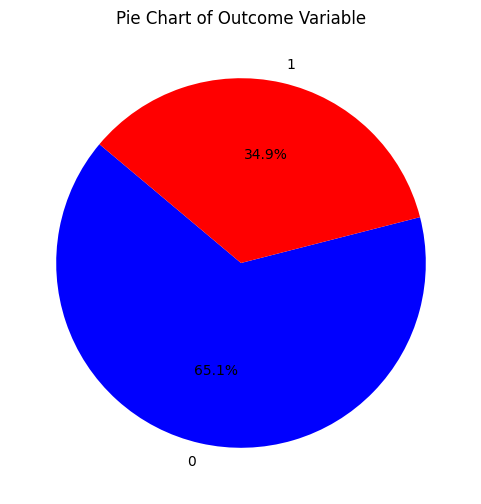

In [ ]:
counts = df['Outcome'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=['blue', 'red'], startangle=140)
plt.title('Pie Chart of Outcome Variable')
plt.show()

Nhìn thấy rõ được **bộ dữ liệu** đang bị **mất cân bằng** với:

**Không mắc bệnh "0":** 34.9%

**Mắc bệnh "1":** 65.1%



## **Truy xuất các đặc trưng**

In [ ]:
numerical_features = df.select_dtypes(include=['int64', 'float64'])
numerical_features.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

# **PHÂN TÍCH ĐƠN BIẾN**

## **Histograms cho từng đặc trưng**

###**Pregnancies**

* **Hình dạng phân bố**: Phân bố lệch phải, với phần lớn dữ liệu tập trung ở số lần mang thai thấp hoặc không mang thai, và một số ít trường hợp có số lần mang thai cao hơn.

* **Xu hướng trung tâm**: Dữ liệu tập trung chủ yếu quanh giá trị phổ biến nhất là 2-3 lần mang thai, đa số cá nhân trong tập dữ liệu có ít lần mang thai.

* **Số lượng**: giảm dần khi số lần mang thai tăng, phần lớn cá nhân có ít lần mang thai và hiếm gặp với số lần mang thai cao.

* **Ngoại lai**: Một số ít trường hợp có số lần mang thai cao bất thường, có thể được coi là ngoại lai.

###**Glucose**

* **Hình dạng phân bố**: Phân bố lệch phải, với phần lớn tập trung ở mức glucose thấp (25-50 mg/dL) trong dữ liệu tiểu đường.

* **Xu hướng trung tâm**: tập trung trong khoảng 25-50 mg/dL, thấp hơn mức bình thường ở khoảng (70-99 mg/dL).

* **Số lượng**: Số lượng cá nhân có mức glucose cao rất ít, với tần suất giảm dần ở các khoảng glucose cao hơn.

* **Ngoại lai**: Có một số trường hợp có mức glucose cao bất thường, có thể do lỗi đo lường, sai nhãn trong thu thập dữ liệu.

###**BloodPressure**

* **Hình dạng phân bố**: Biểu đồ thể hiện phân bố giá trị huyết áp từ 20 đến 120, với tần suất cao nhất trong khoảng 60-100, và ít trường hợp hơn ở các giá trị cực đoan.

* **Xu hướng trung tâm**: Phần lớn dữ liệu tập trung trong khoảng 60-100, nhưng mức huyết áp thấp hơn (dưới 90) có thể chỉ ra hạ huyết áp.
* **Số lượng**: giảm mạnh ở hai đầu, đặc biệt là ở mức huyết áp cực thấp hoặc cực cao.

* **Ngoại lai**: Các giá trị huyết áp thấp hoặc bất thường có thể là ngoại lệ.

###**SkinThickness**

* **Hình dạng phân bố**: cao nhất trong khoảng 30-40 mm. Phân bố lệch phải, cho thấy phần lớn bệnh nhân có độ dày da trung bình, với một số ít có giá trị cao hơn.

* **Xu hướng trung tâm**: nằm trong khoảng 30-40 mm, đại diện cho phần lớn các bệnh nhân có độ dày da ở mức trung bình.

* **Số lượng**: Tần suất giảm dần ở các giá trị cao hơn, với một số ít trường hợp trên 70 mm, có thể là ngoại lệ.

* **Ngoại lai**: Giá trị độ dày da bằng 0 và Các giá trị trên 70 mm có thể là ngoại lai.

###**Insulin**

* **Hình dạng phân bố**: tần suất cao nhất đạt 400. Phân bố có nhiều đỉnh, với các đỉnh quanh 200, 400, và 600.

* **Xu hướng trung tâm**: Không có giá trị trung tâm rõ ràng do phân bố nhiều đỉnh.

* **Số lượng**: Tần suất tập trung tại một số mức insulin nhất định, nhưng các giá trị cao thường gặp ở tiểu đường loại loại 2 và giá trị thấp hơn thường gặp ở tiểu đường loại 1.

* **Ngoại lai**: Các giá trị bằng 0 có thể dữ liệu bị thiếu.

###**BMI**

* **Hình dạng phân bố**: Biểu đồ BMI dao động từ 10 đến 70, với tần suất cao nhất trong khoảng 20-30, phản ánh sự tập trung ở nhóm cân nặng bình thường đến thừa cân. Phân bố lệch phải, với đuôi dài ở mức BMI cao.

* **Xu hướng trung tâm**: Giá trị phổ biến nhất nằm trong khoảng 20-30 BMI, đại diện cho nhóm bình thường đến thừa cân. Một phần lớn cũng nằm trong khoảng 30-40, cho thấy sự hiện diện đáng kể của béo phì.

* **Số lượng**: Phần lớn dân số tập trung ở nhóm BMI từ 20 đến 40, với số ít trường hợp có BMI cực thấp (dưới 18.5) hoặc cực cao (trên 70), có thể là ngoại lệ hoặc lỗi dữ liệu.

* **Ngoại lai**: BMI dưới 18.5 (thiếu cân) và trên 70 (rất cao) hiếm gặp và có thể đại diện cho lỗi nhập liệu, trường hợp cực đoan, hoặc các vấn đề sức khỏe nghiêm trọng cần điều tra thêm.

###**DiabetesPedigreeFunction**

* **Hình dạng phân bố**: tần suất cao nhất trong khoảng 0.0 đến 0.5 và giảm dần ở các giá trị cao hơn, cho thấy phần lớn cá nhân có nguy cơ di truyền thấp đối với tiểu đường.

* **Xu hướng trung tâm**: nằm trong khoảng 0.0 đến 0.5, chỉ ra rằng hầu hết cá nhân trong dữ liệu có yếu tố di truyền thấp đối với tiểu đường.

* **Số lượng**: ít người có nguy cơ di truyền cao hơn.


###**Age**

* **Hình dạng phân bố**: Biểu đồ thể hiện tần suất giảm dần theo độ tuổi, với tần suất cao nhất ở nhóm tuổi trẻ (20-30 tuổi) và thấp nhất ở nhóm tuổi lớn nhất (40-50 tuổi), cho thấy một sự lệch về phía người trẻ trong tập dữ liệu.

* **Xu hướng trung tâm**: Tập dữ liệu tập trung vào độ tuổi trẻ, có thể liên quan đến tiểu đường loại 1.

* **Số lượng**: Tần suất tối đa lên đến 140, cho thấy số người tham gia lớn hơn 140.

* **Ngoại lai**: Phạm vi tuổi có vẻ hợp lý

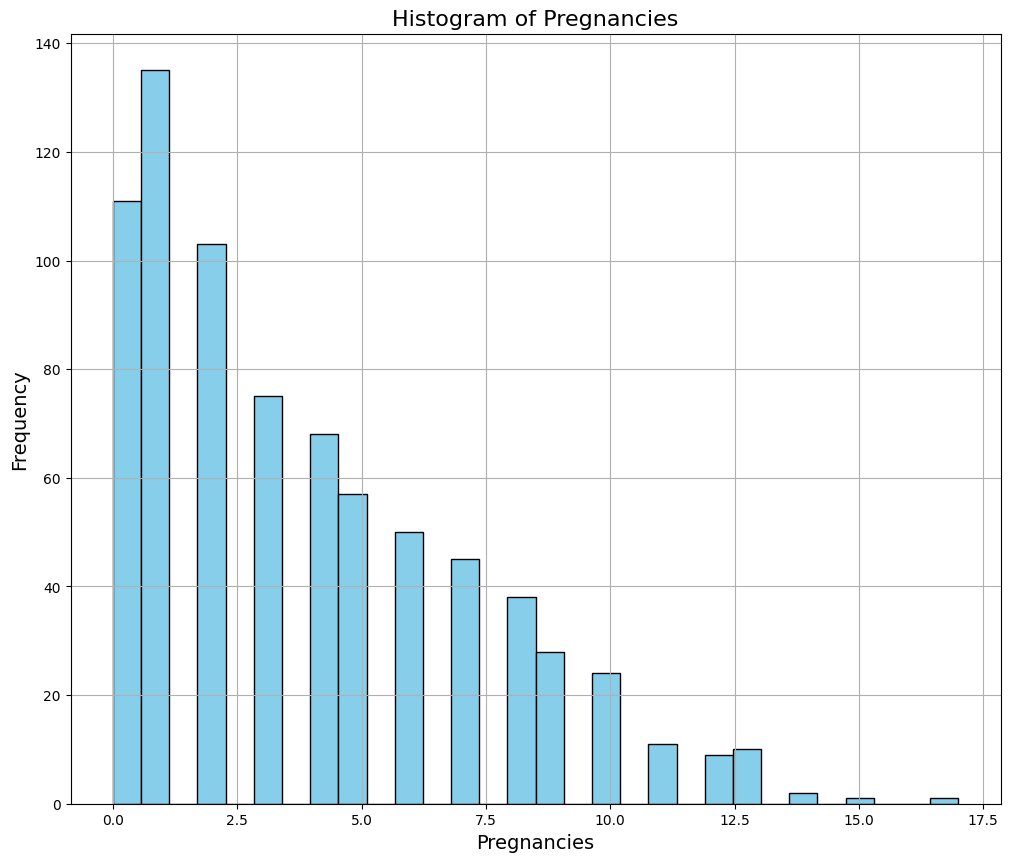

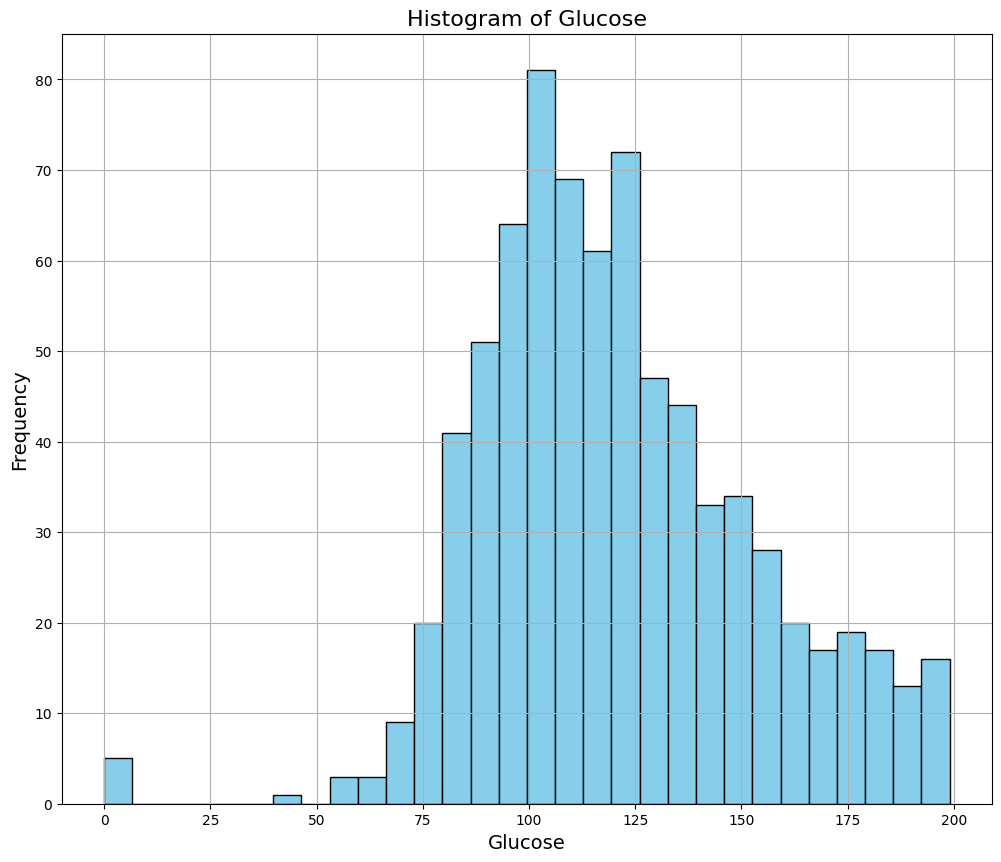

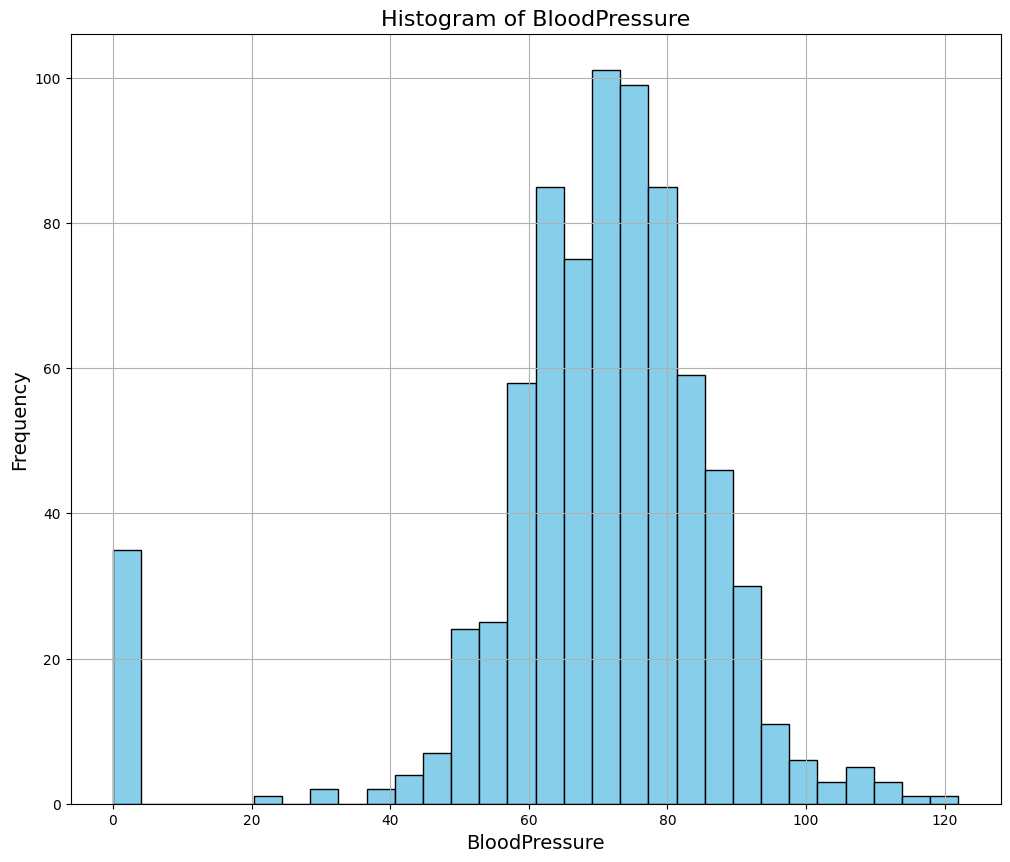

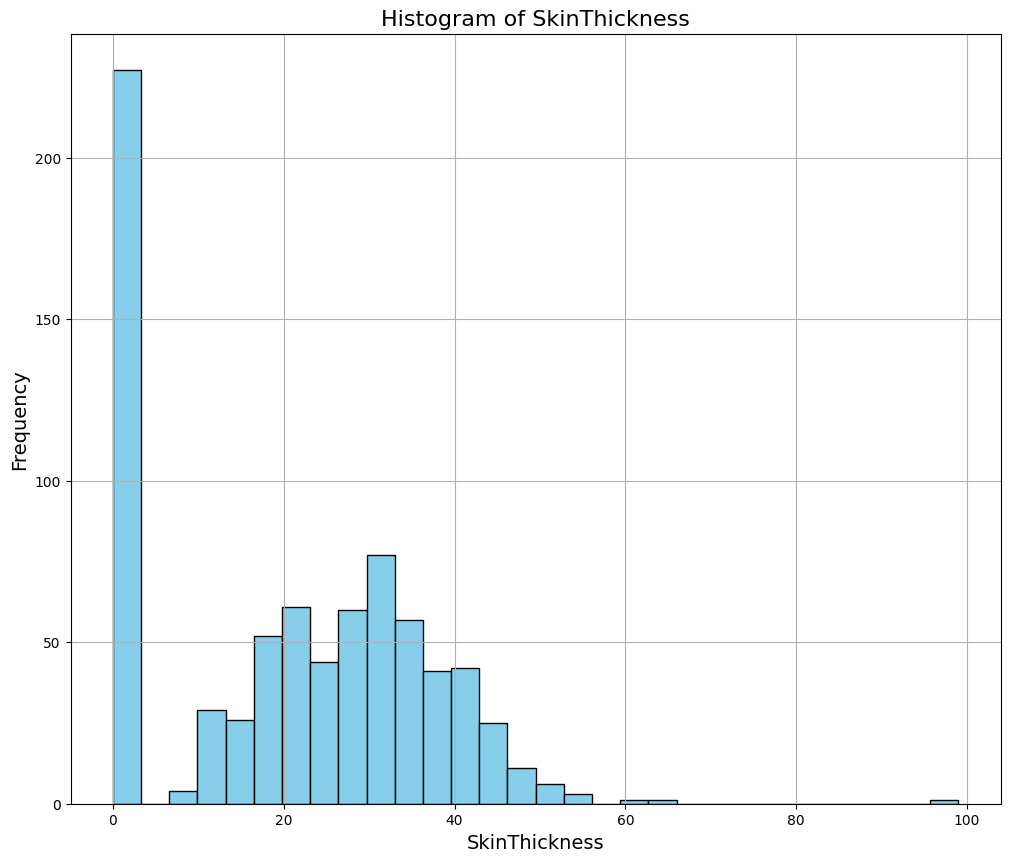

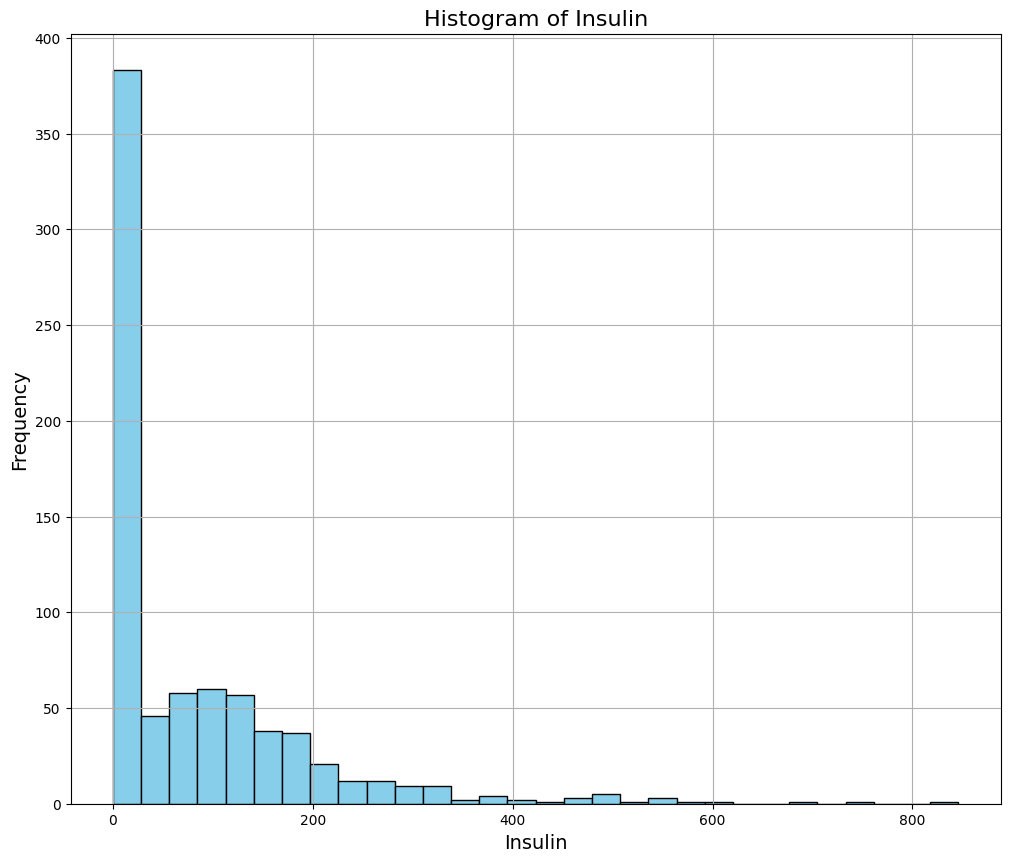

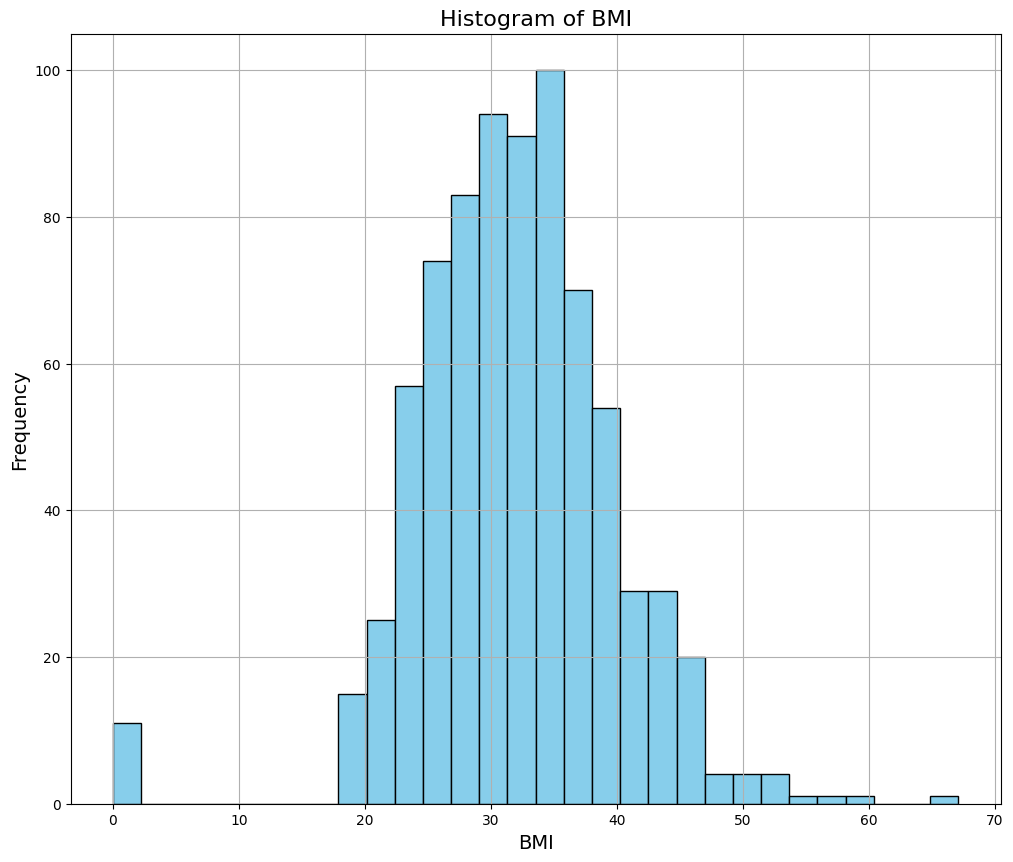

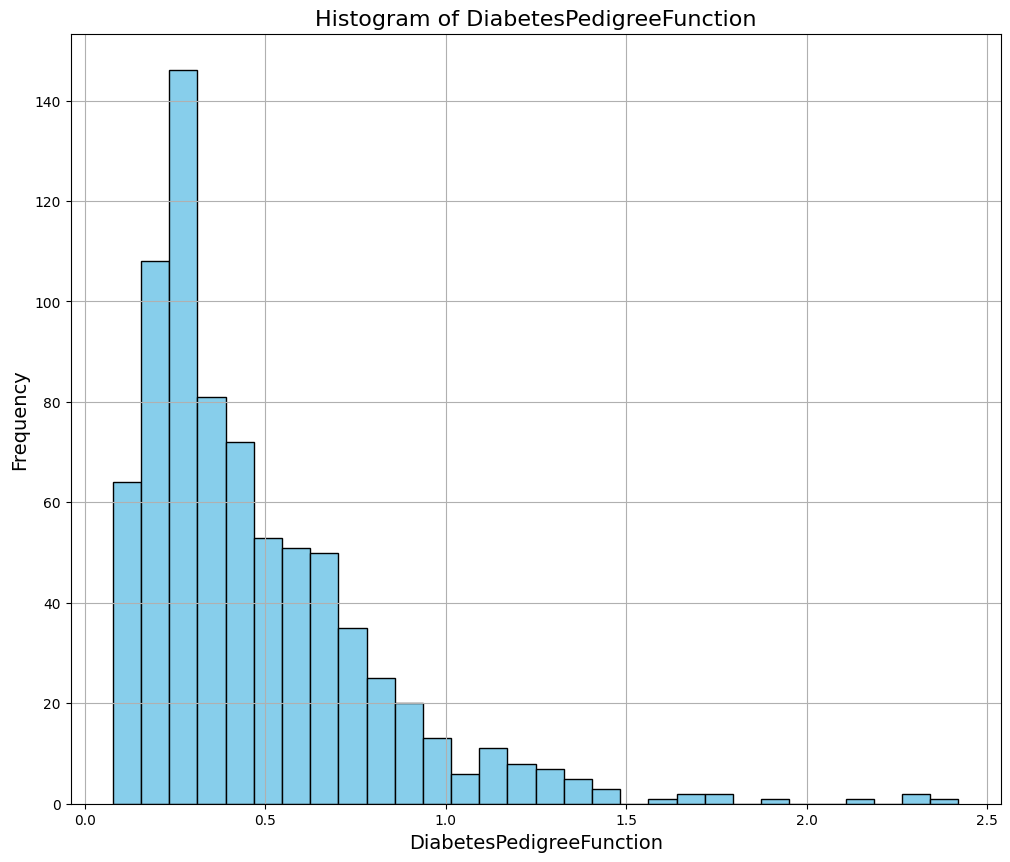

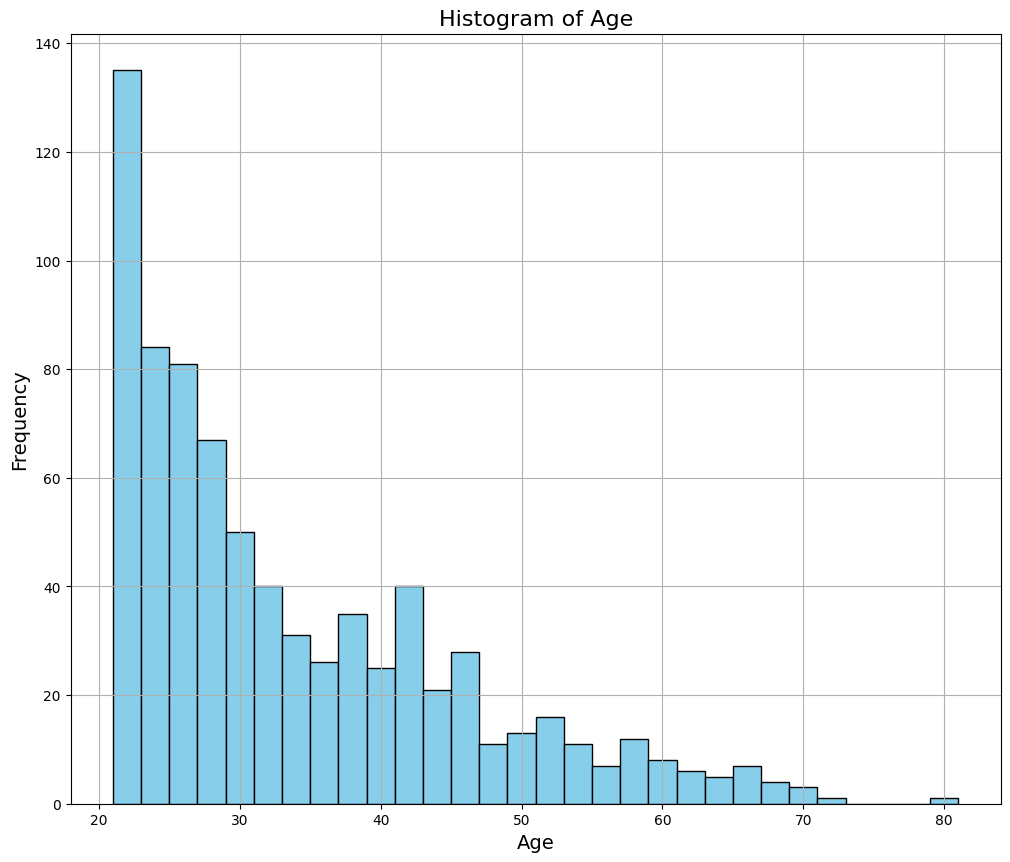

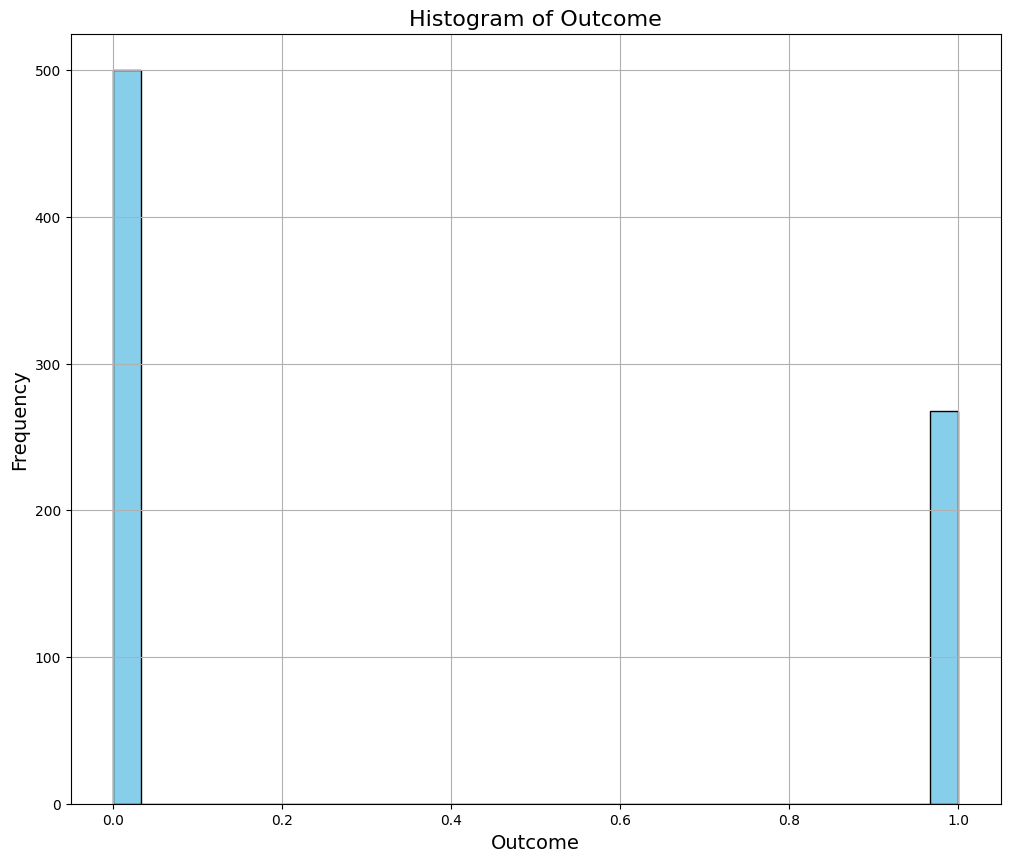

In [ ]:
numerical_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

for feature in numerical_features:
  plt.figure(figsize=(12, 10))
  plt.hist(df[feature], bins=30, color='skyblue', edgecolor='black')
  plt.title(f'Histogram of {feature}', fontsize=16)
  plt.xlabel(feature, fontsize=14)
  plt.ylabel('Frequency', fontsize=14)
  plt.grid(True)
  plt.show()

## **Biểu đồ boxplot cho từng đặc trưng**

**Tính toàn vẹn dữ liệu và phát hiện ngoại lai:**

**Pregnancies:** Dữ liệu đang có ngoại lai, bởi có những mẫu mang thai rất cao(trên 13 lần).

**Glucose:** Tồn tại giá trị ngoại lai bằng 0 (theo dữ liệu y học thì Glucose là không hợp lí).

**Bloodpressure:** Giá trị tối thiểu là 0 (theo dữ liệu y học thì Blood pressure là không hợp lí).

**Skinthickness:** Giá trị lên đến 100 mm là quá cao và Skin thickness trong y học cũng không cho phép bằng 0.

**Insulin:** có nhều mức insulin cao nên cần kiểm tra ngoại lai để chứng thực.

**BMI:** Khoảng từ 0 đến 70, giá trị trên 40 cần kiểm tra lại và các giá trị bằng 0 là không được phép.

**DiabetesPedigreeFunction:** Khoảng từ 0 đến 2.5, các giá trị trên 1 chỉ ra nguy cơ di truyền cao hơn.

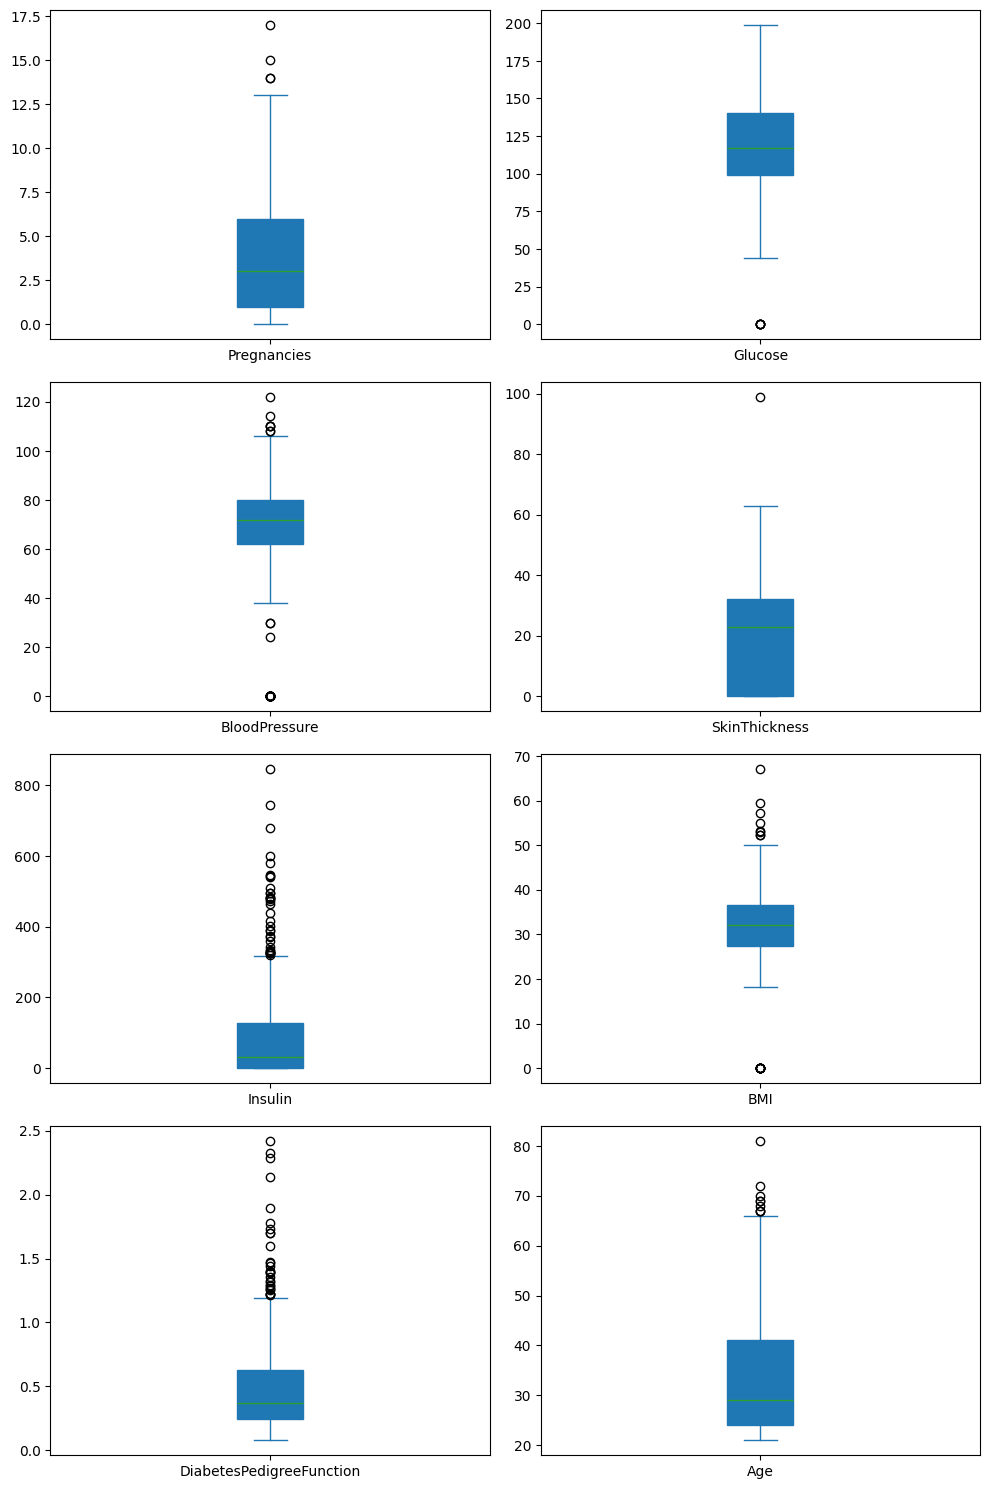

In [ ]:
# List of numerical features
numerical_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Plotting boxplots for each numerical feature
df[numerical_features].plot(kind='box', subplots=True, layout=(4, 2), figsize=(10, 15), patch_artist=True)
plt.tight_layout()
plt.show()

**Pregnancies:** phân bố tương đối giống nhau giữa hai nhóm, cần xem xét về đặc trưng có gây ảnh hưởng đến Outcome.

**Glucose:** Mức Glucose thấp ở người không mắc tiểu đường có tần suất cao hơn ở mức độ glucose thấp, điều này cho biết người không mắc tiểu đường có mức glucose thấp hơn và ngược lại

**BloodPressure:**

**SkinThickness:**

**Insulin:**

**BMI:**

**DiabetesPedigreeFunction:**

**Age:**

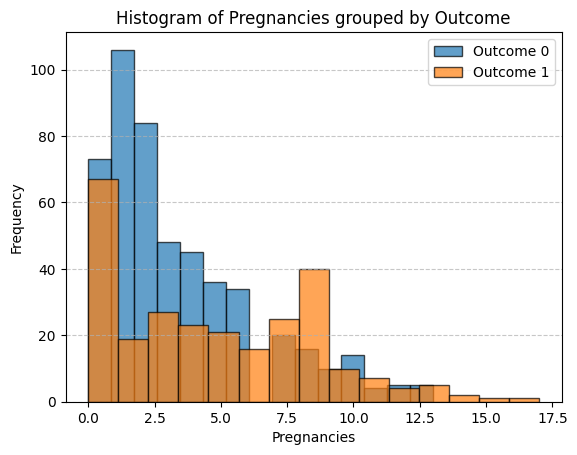

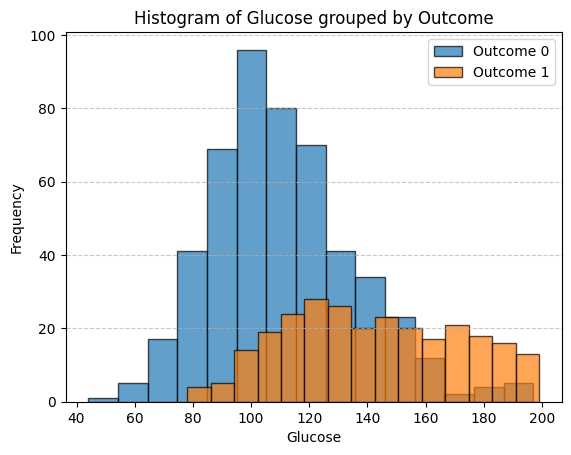

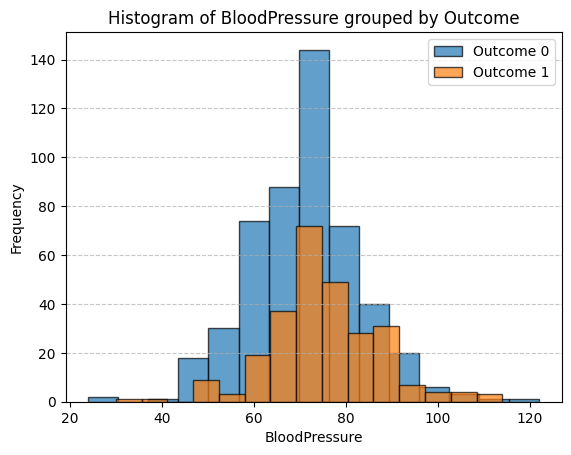

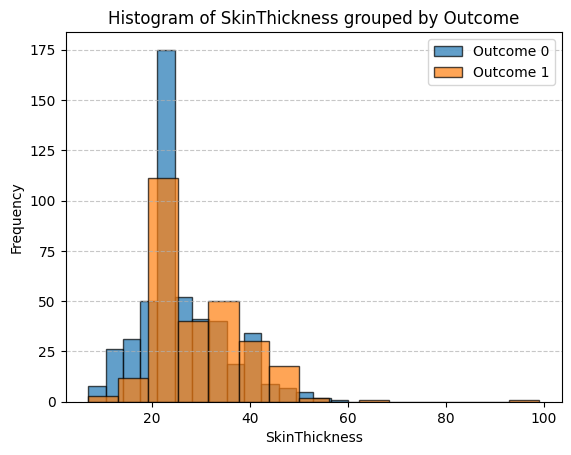

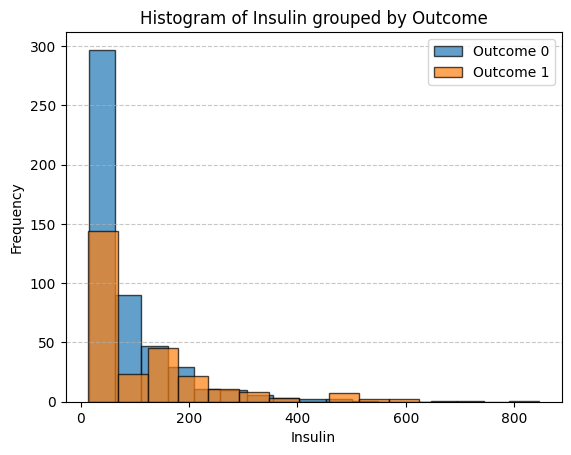

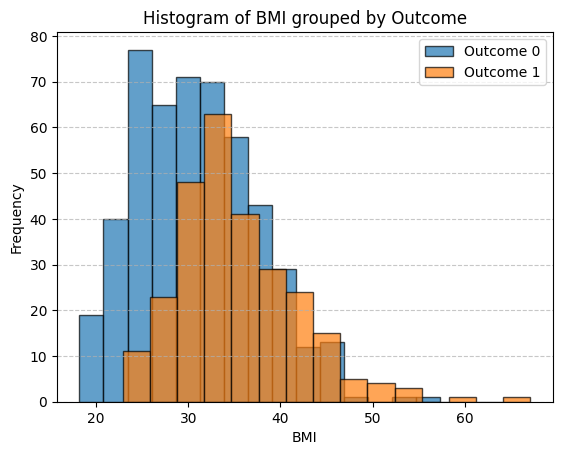

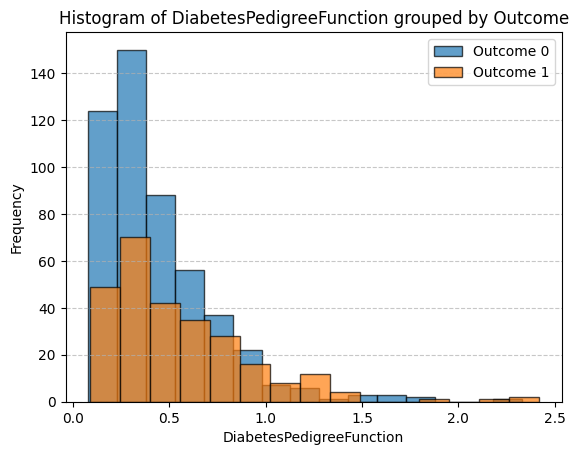

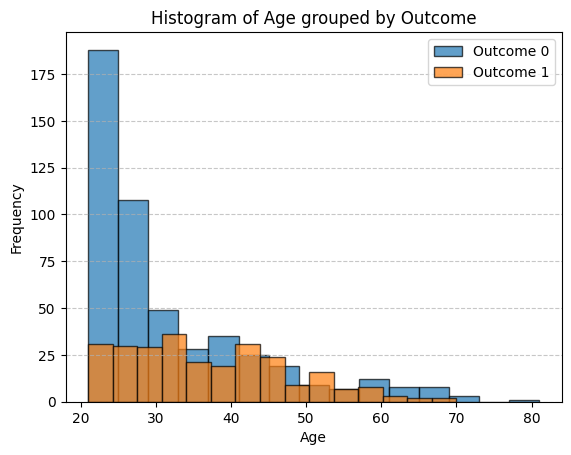

In [ ]:
# Redefine numerical_features
numerical_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                      'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

# Plotting histograms for each numerical feature grouped by Outcome (0 and 1)
for feature in numerical_features[:-1]:  # Exclude 'Outcome' itself from the loop
    plt.figure()
    plt.hist(df[df['Outcome'] == 0][feature], bins=15, alpha=0.7, label='Outcome 0', edgecolor='black')
    plt.hist(df[df['Outcome'] == 1][feature], bins=15, alpha=0.7, label='Outcome 1', edgecolor='black')
    plt.title(f'Histogram of {feature} grouped by Outcome')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


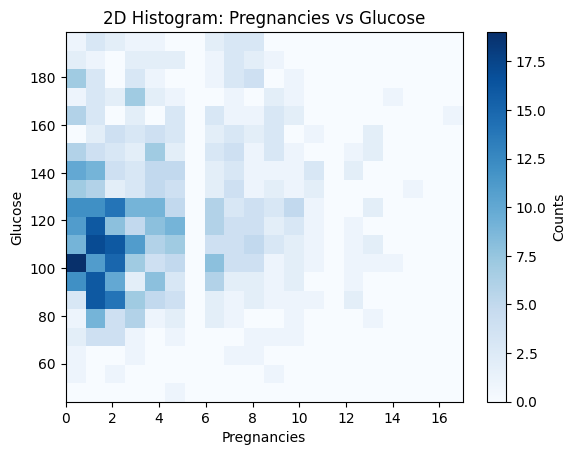

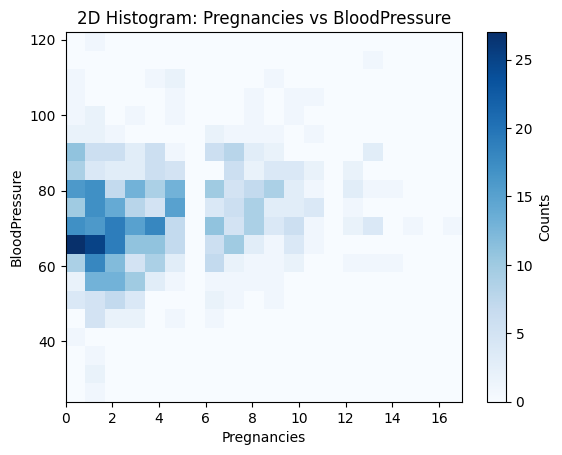

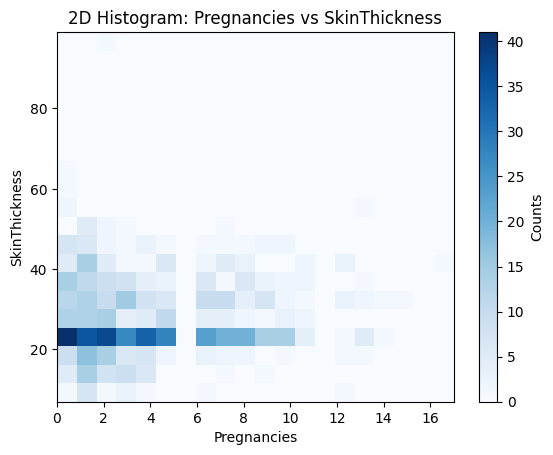

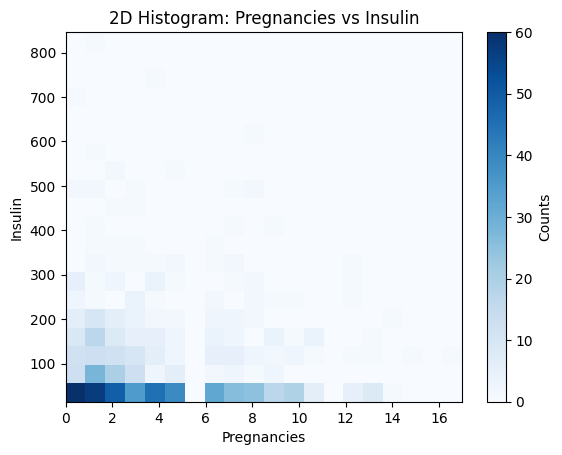

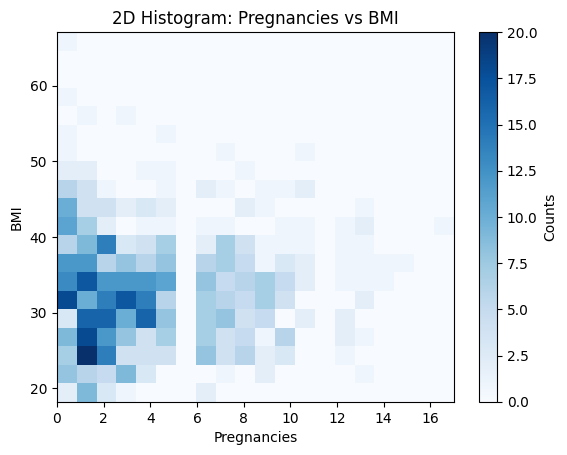

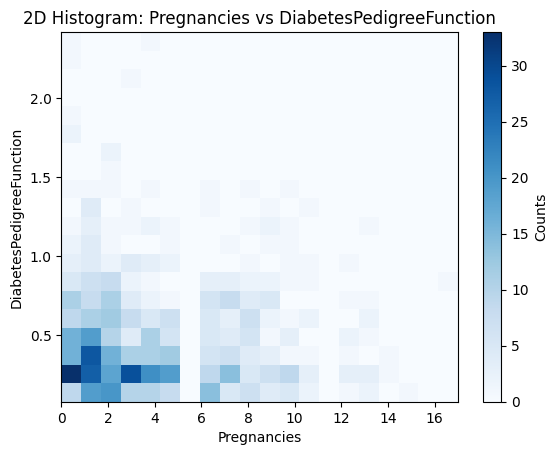

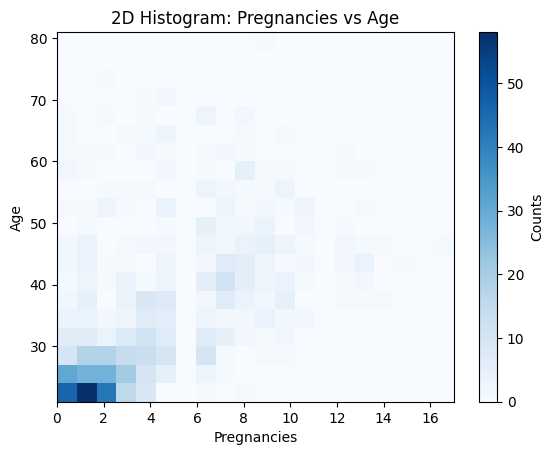

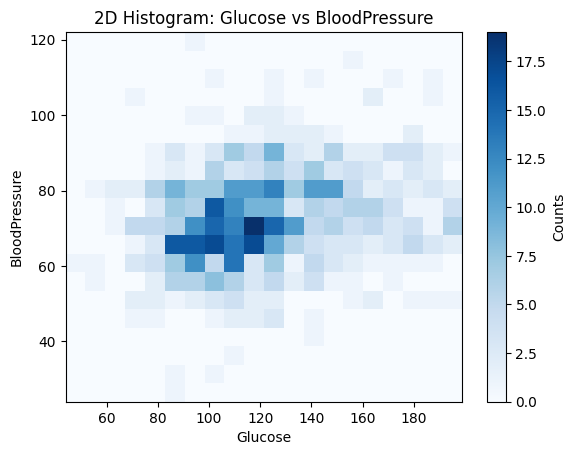

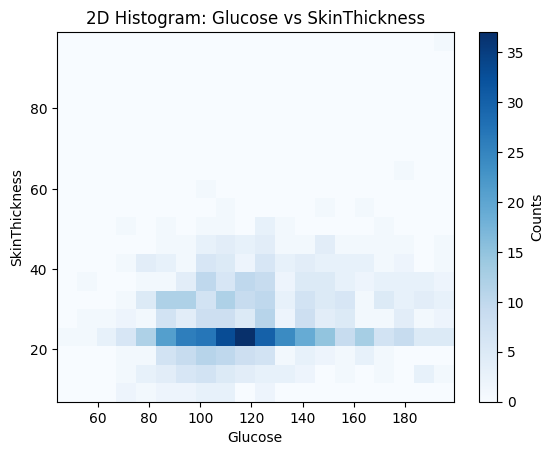

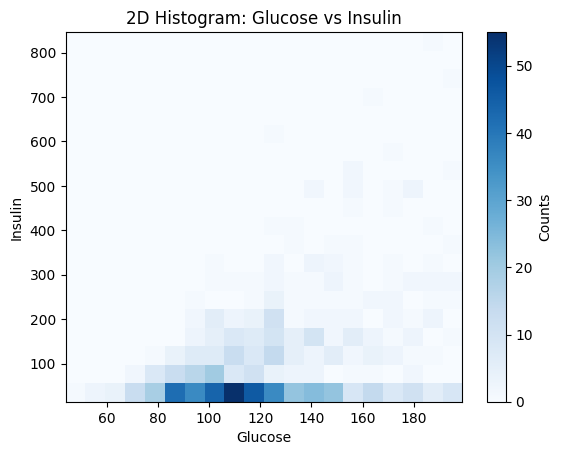

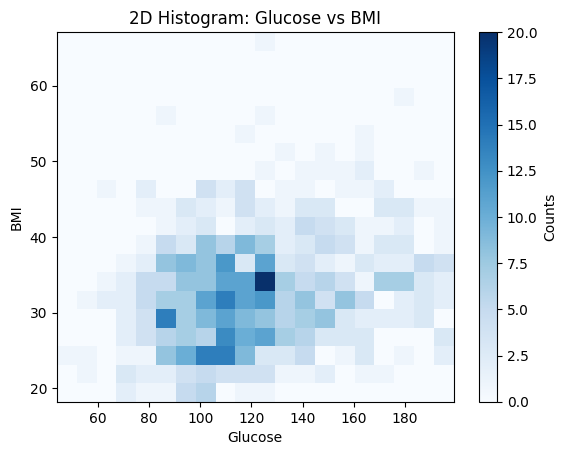

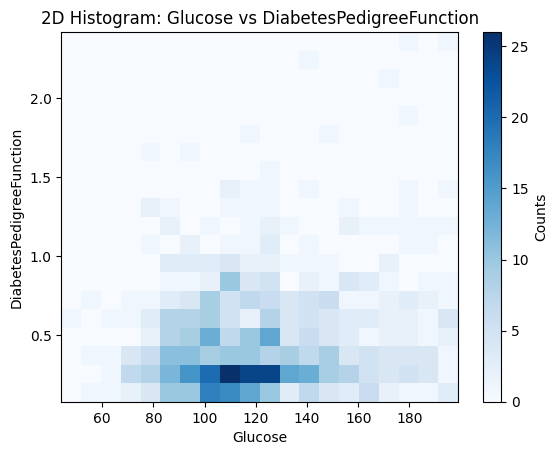

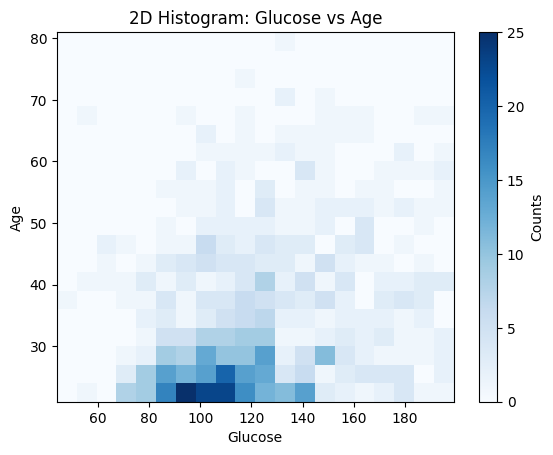

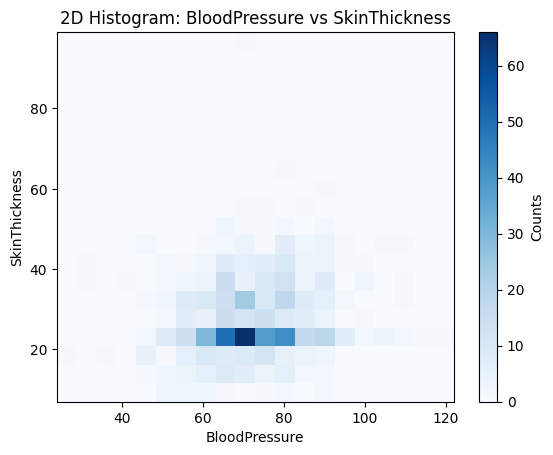

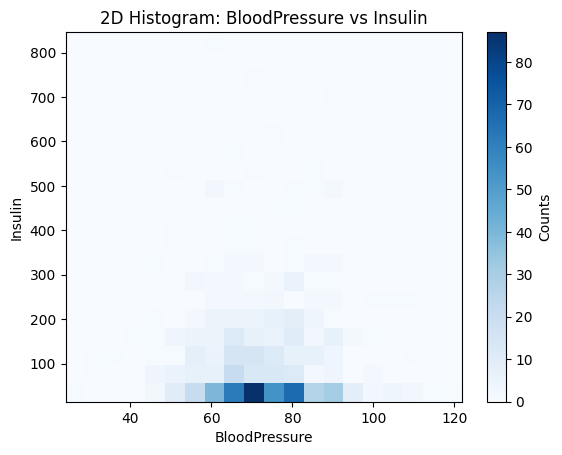

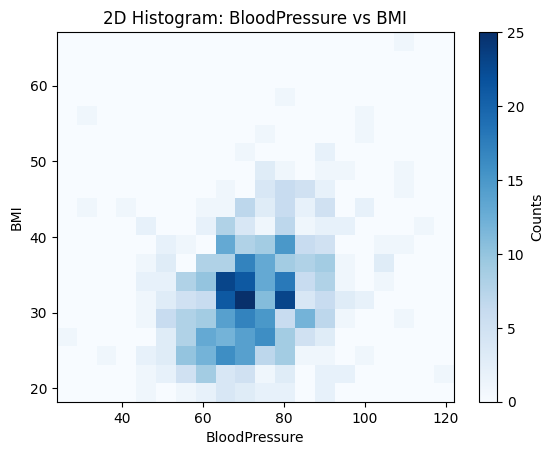

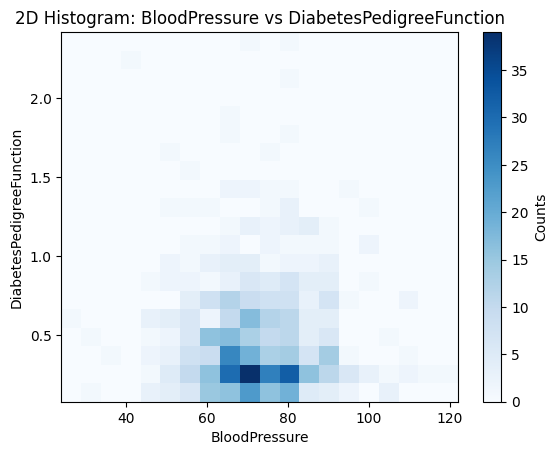

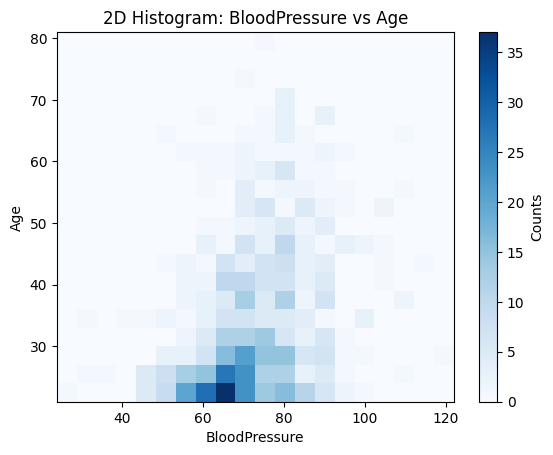

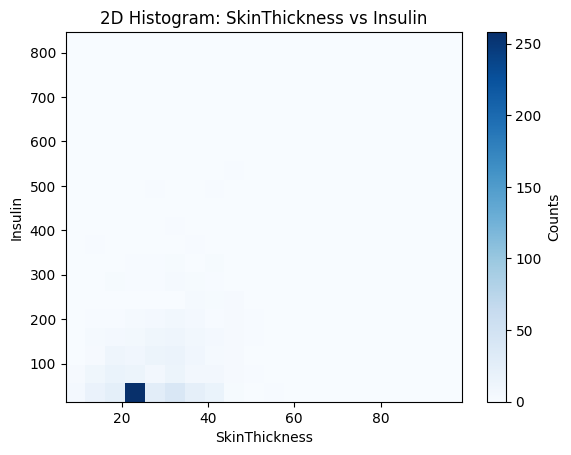

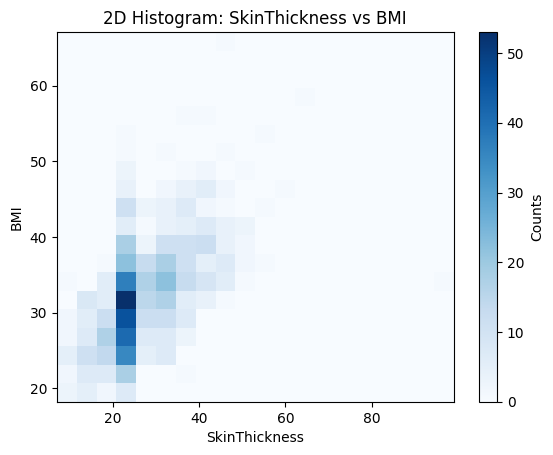

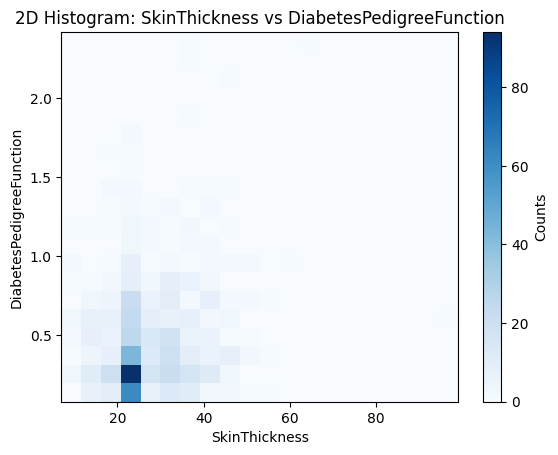

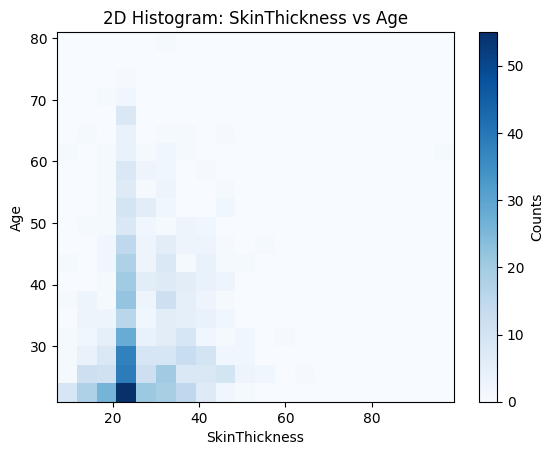

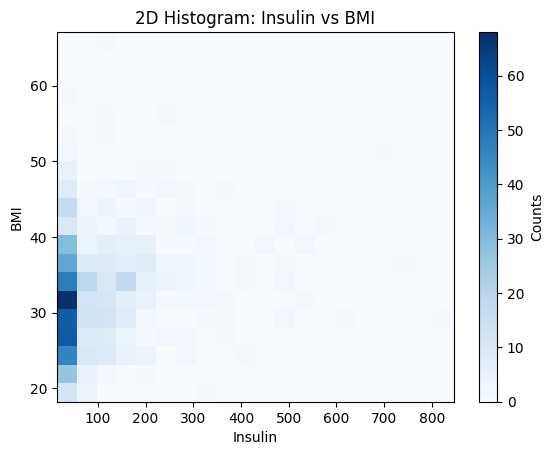

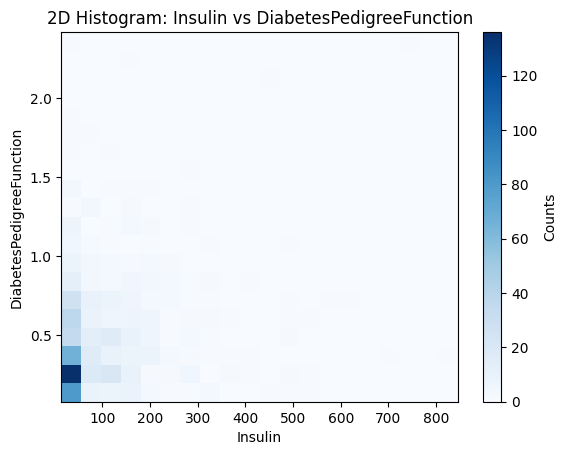

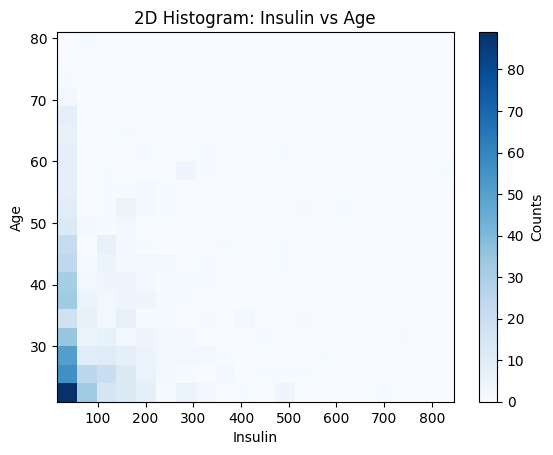

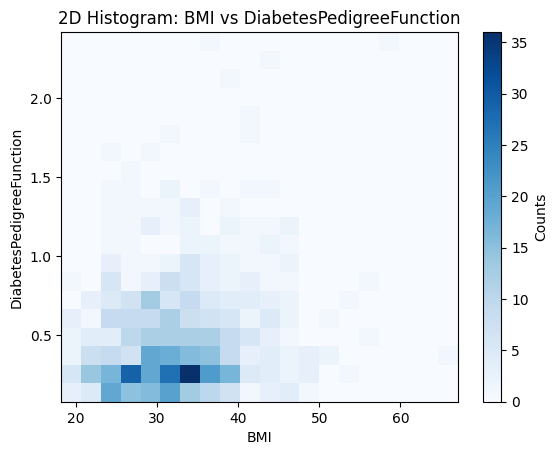

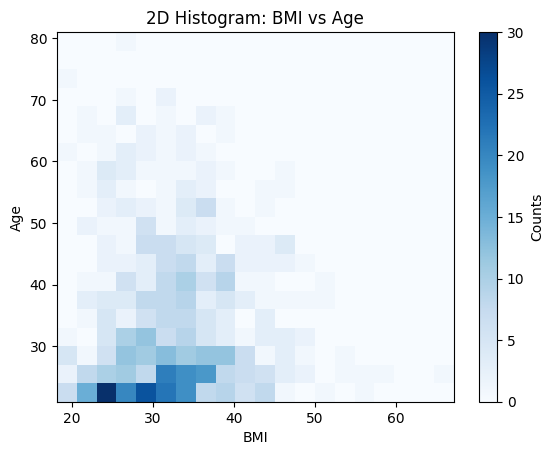

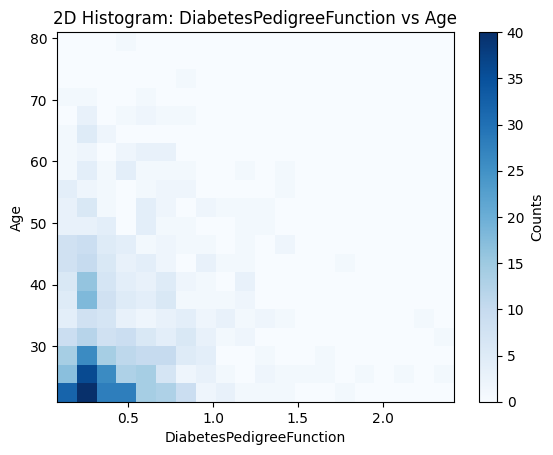

In [ ]:
for i, feature1 in enumerate(numerical_features[:-1]):  # Exclude 'Outcome'
    for feature2 in numerical_features[i+1:-1]:  # Pair only with subsequent features
        plt.figure()
        plt.hist2d(df[feature1], df[feature2], bins=20, cmap='Blues')
        plt.title(f'2D Histogram: {feature1} vs {feature2}')
        plt.xlabel(feature1)
        plt.ylabel(feature2)
        plt.colorbar(label='Counts')
        plt.show()

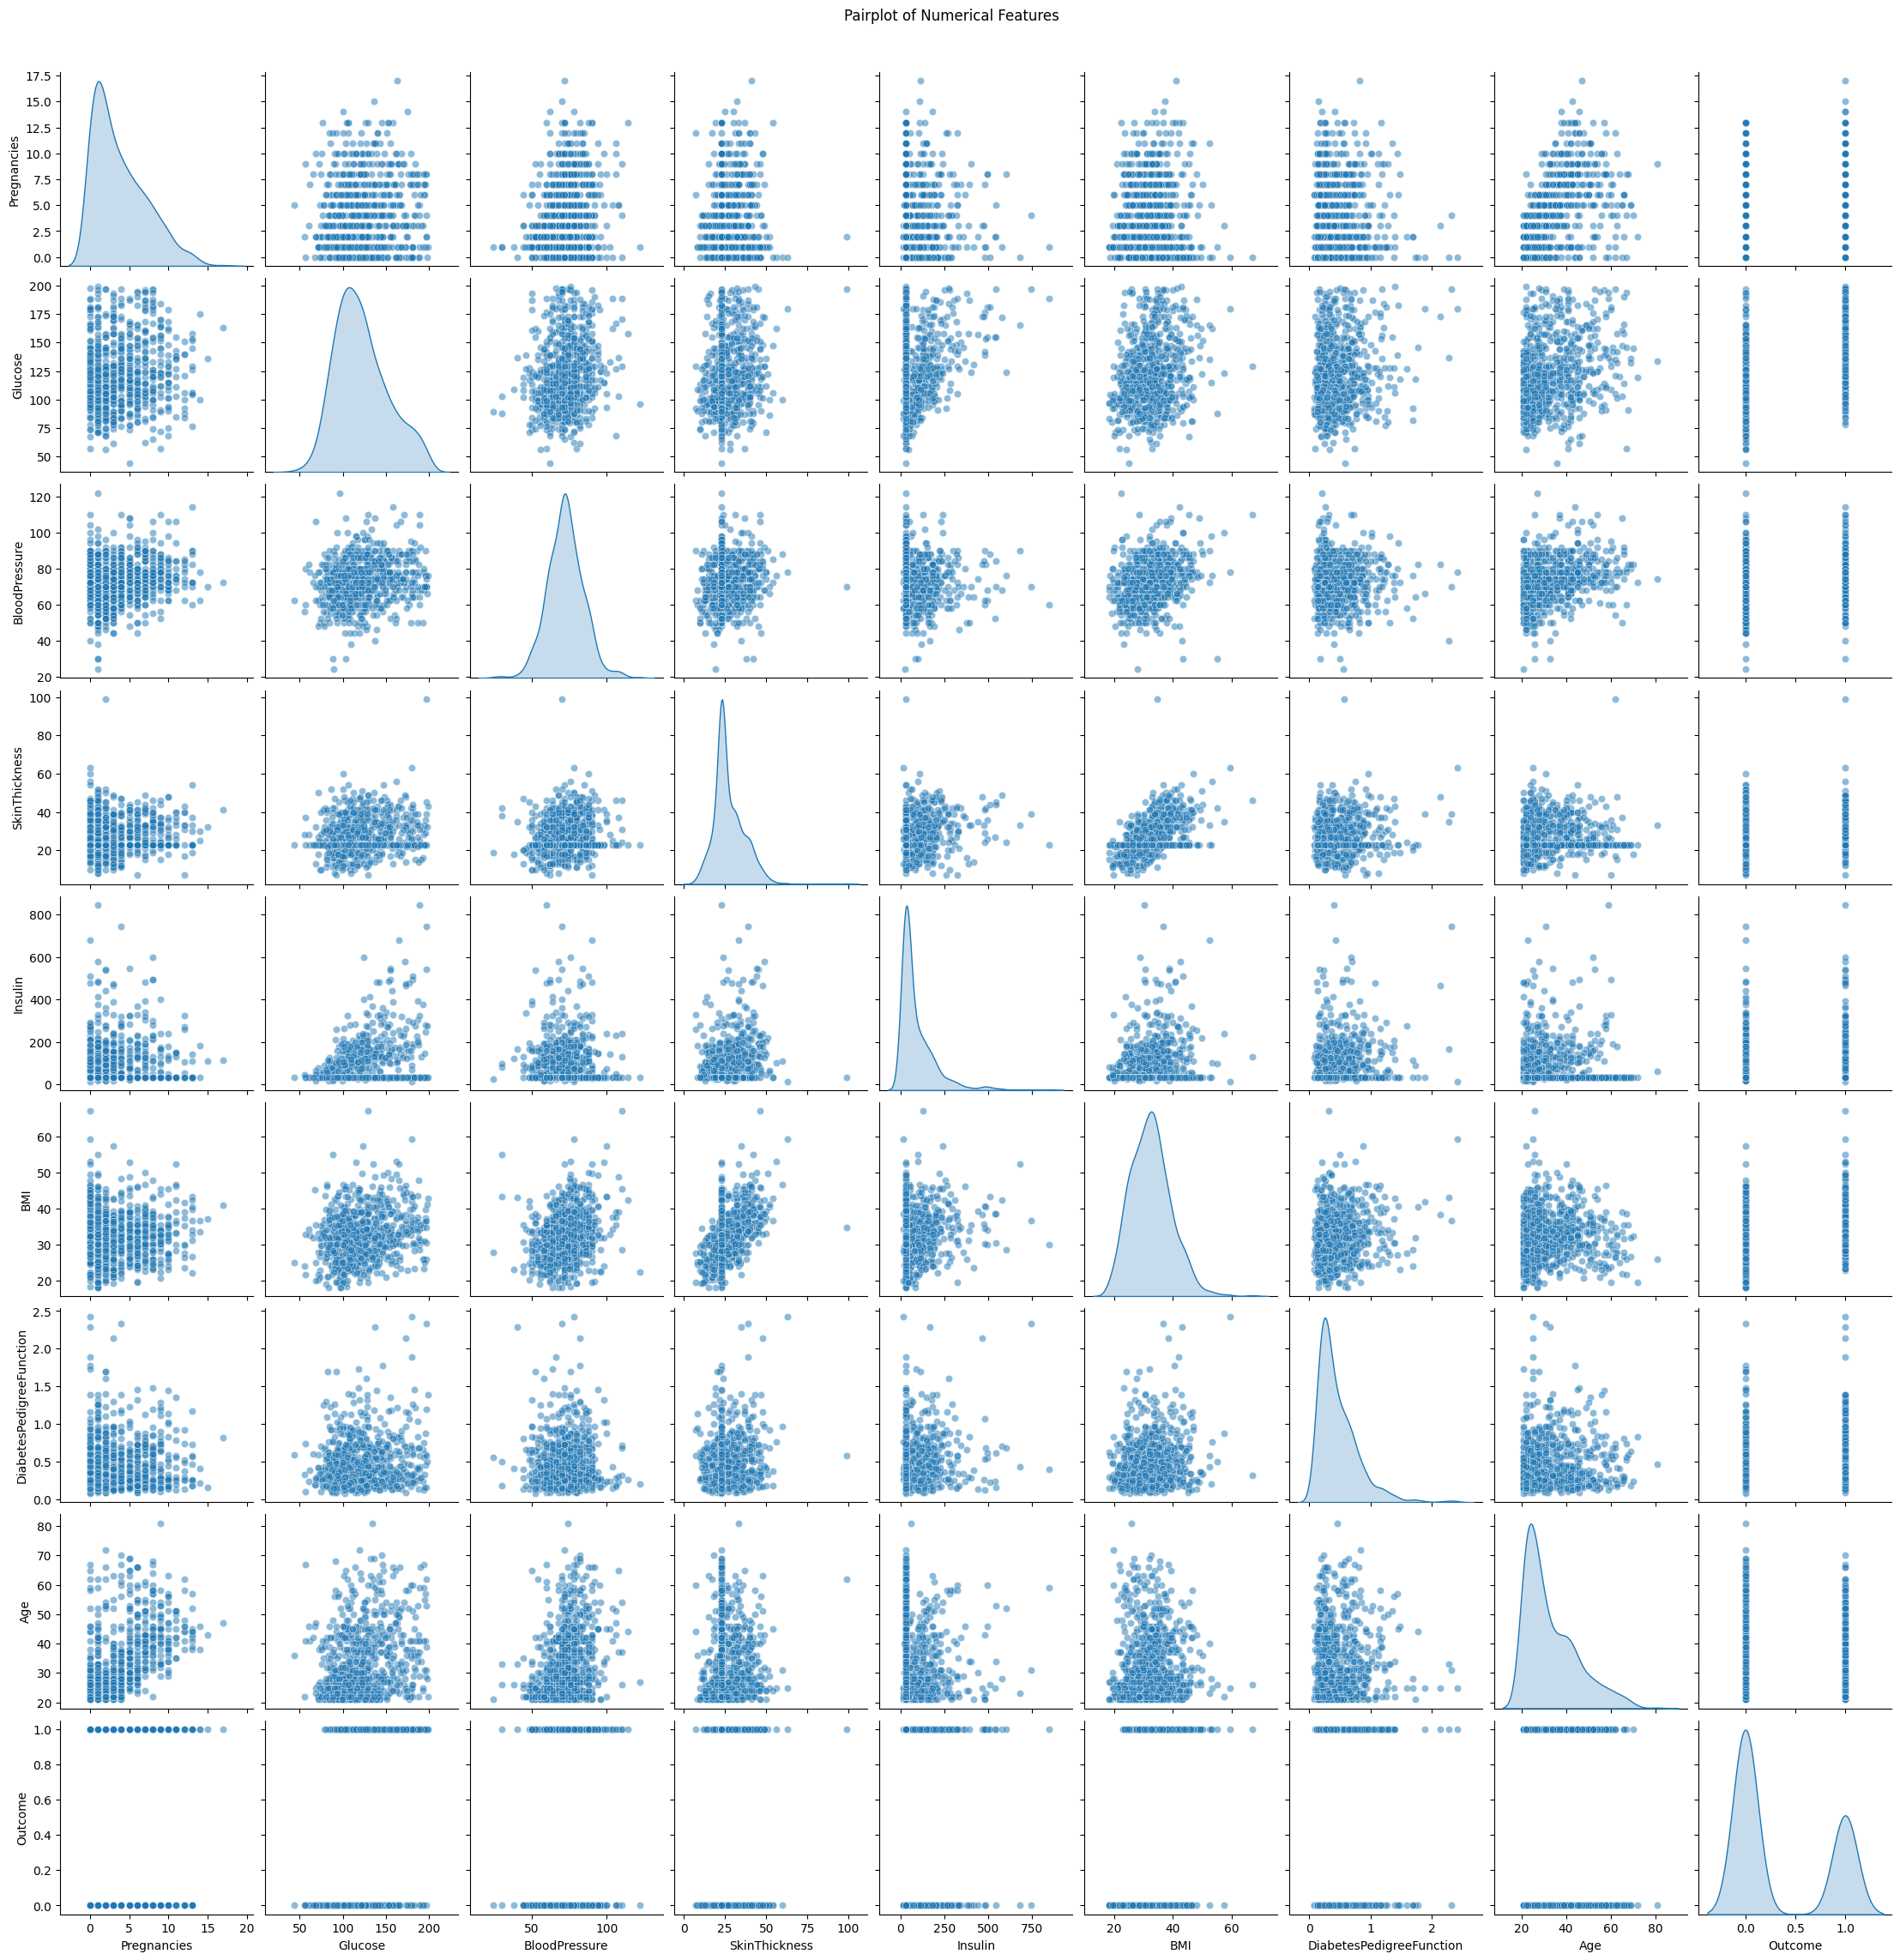

In [ ]:
# Plot pairplot for all numerical features
sns.pairplot(df[numerical_features], diag_kind='kde', plot_kws={'alpha': 0.5})
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()


# **PHÂN TÍCH ĐA BIẾN**

Phát hiện một số **đặc trưng kém quan trọng** với Outcome là **BloodPressure**, **SkinThickness** và **Insulin**. Đồng thời cũng tìm ra được các đặc trưng **quan trọng** tuyến tính là **Glucose**, **BMI**, **Pregnancies**, **DiabetesPedigreeFunction**.

Tương quan giữa **Pregnancies và Age** là (0.54) là khá cao cần chú ý để **tránh đa cộng tuyến** trong mô hình.


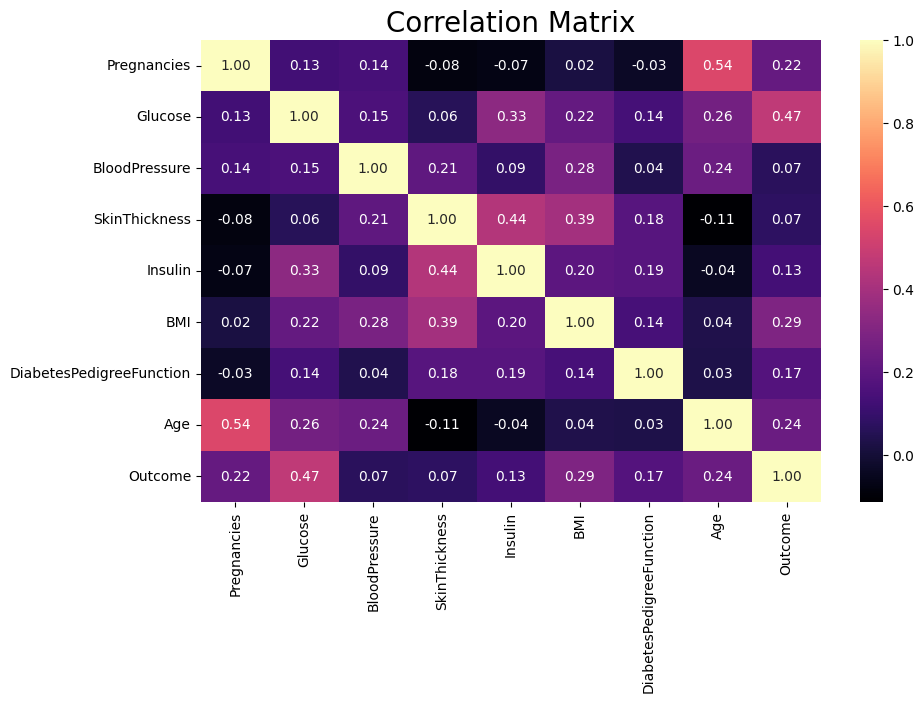

In [ ]:
# Correlation matrix
f, ax = plt.subplots(figsize=[10, 6])
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax, cmap="magma")
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()